In [64]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from LSTUR import Tokenizer
from collections import Counter

In [9]:
# Load tsv file
News = pd.read_csv('MINDsmall_train/news.tsv', sep='\t', header=None)
News.columns = ['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']
News_vali = pd.read_csv('MINDsmall_dev/news.tsv', sep='\t', header=None)
News_vali.columns = ['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']

News = pd.concat([News, News_vali], ignore_index=True)
News = News.drop_duplicates(subset='news_id')

UserData = pd.read_csv('MINDsmall_train/behaviors.tsv', sep='\t', header=None)
UserData.columns = ['impression_id', 'user_id', 'time', 'history', 'impressions']
UserData_vali = pd.read_csv('MINDsmall_dev/behaviors.tsv', sep='\t', header=None)
UserData_vali.columns = ['impression_id', 'user_id', 'time', 'history', 'impressions']
UserData = pd.concat([UserData, UserData_vali], ignore_index=True)

UserData = UserData.dropna()

topic_size = News['category'].nunique()
subtopic_size = News['subcategory'].nunique()

print(f"Data contains {topic_size} topics and {subtopic_size} subtopics")

Data contains 18 topics and 270 subtopics


In [10]:
print(UserData['time'])

0          11/11/2019 9:05:58 AM
1          11/12/2019 6:11:30 PM
2          11/14/2019 7:01:48 AM
3          11/11/2019 5:28:05 AM
4          11/12/2019 4:11:21 PM
                   ...          
230112     11/15/2019 8:40:16 PM
230113     11/15/2019 1:11:26 PM
230114     11/15/2019 3:37:06 PM
230115     11/15/2019 8:29:26 AM
230116    11/15/2019 11:54:34 AM
Name: time, Length: 224665, dtype: object


Min history length: 1
Max history length: 558
Mean history length: 33.25018583223911
Standard deviation history length: 40.06230973294935
Median of history length 20.0


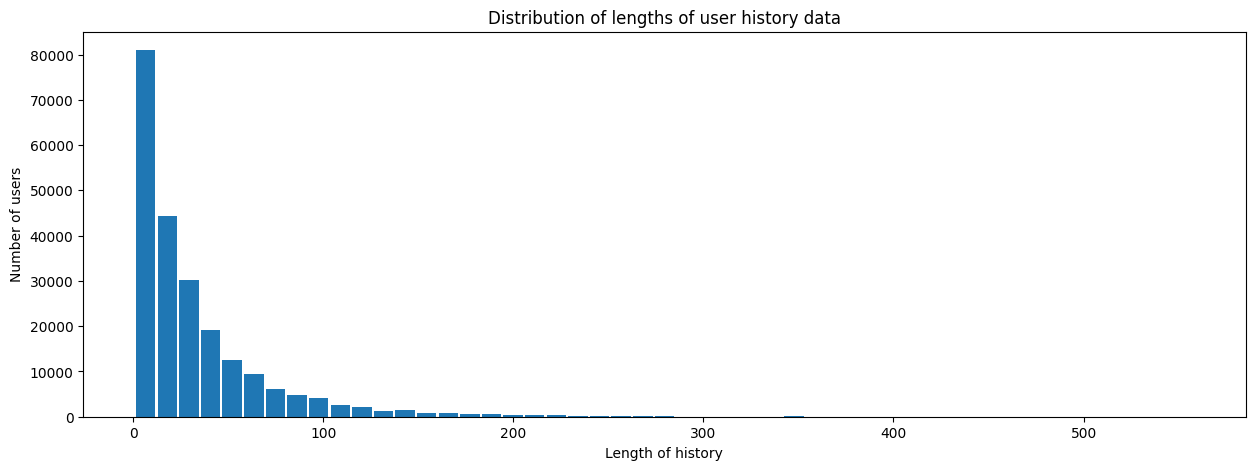

In [11]:
# Find lengths of user data
Histories = UserData['history']

his_len = [len(t.split(" ")) for t in Histories]
print(f"Min history length: {min(his_len)}")
print(f"Max history length: {max(his_len)}")
print(f"Mean history length: {np.mean(his_len)}")
print(f"Standard deviation history length: {np.std(his_len)}")
print(f"Median of history length {np.median(his_len)}")


# Plotting distribution
bins = np.linspace(min(his_len), max(his_len), 50)
hist, edges = np.histogram(his_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of user history data")
ax.set_xlabel("Length of history")
ax.set_ylabel("Number of users")
plt.show()


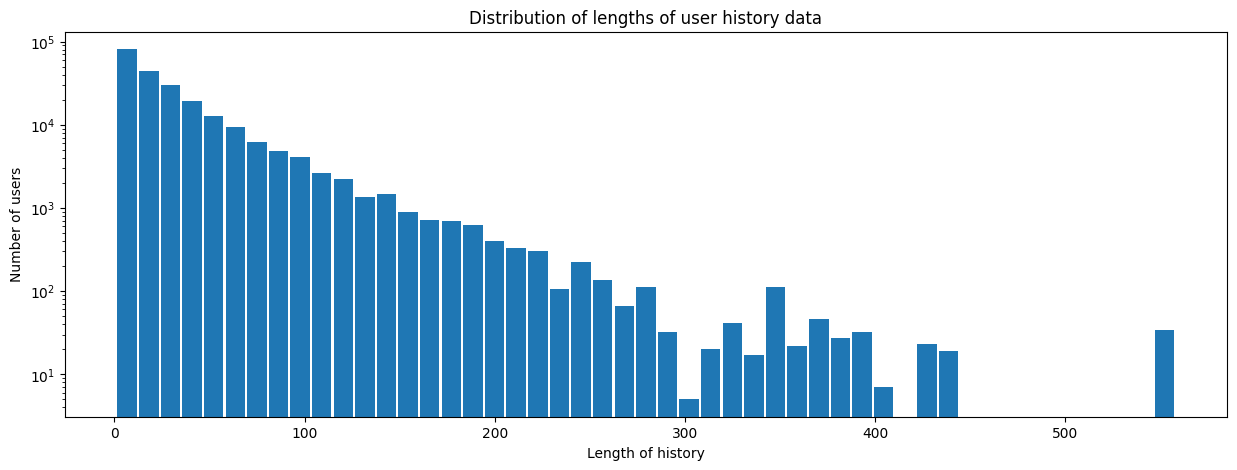

In [12]:
# Plotting on a logarithmic scale
bins = np.linspace(min(his_len), max(his_len), 50)
hist, edges = np.histogram(his_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of user history data")
ax.set_yscale('log')
ax.set_xlabel("Length of history")
ax.set_ylabel("Number of users")
plt.show()


Min impression length: 2
Max impression length: 299
Mean impression length: 37.304844991431686
Standard deviation impression length: 38.86322919170661
Median of impression length 24.0


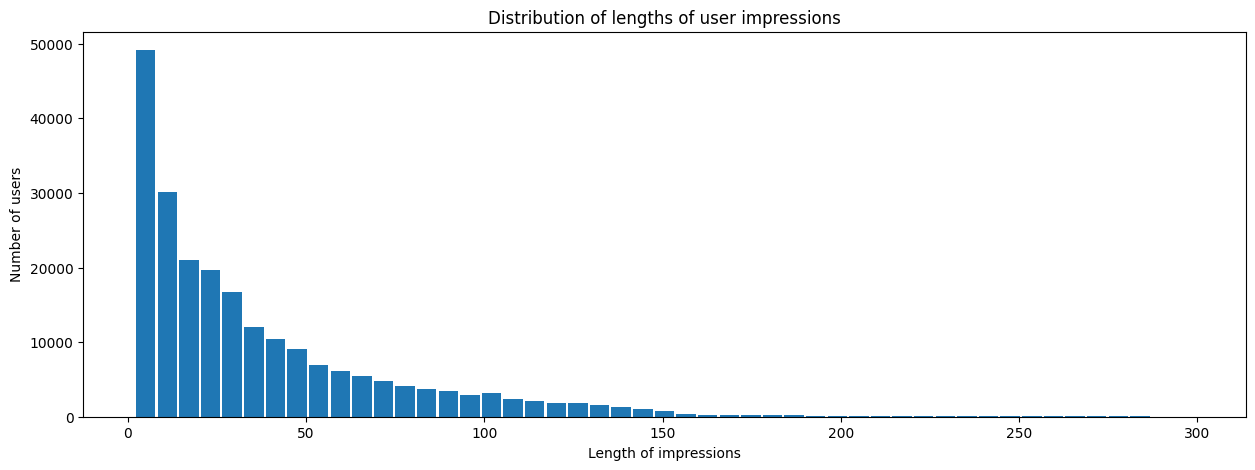

In [13]:
# Find impressions from user data
Impressions = UserData['impressions']

imp_len = [len(t.split(" ")) for t in Impressions]
print(f"Min impression length: {min(imp_len)}")
print(f"Max impression length: {max(imp_len)}")
print(f"Mean impression length: {np.mean(imp_len)}")
print(f"Standard deviation impression length: {np.std(imp_len)}")
print(f"Median of impression length {np.median(imp_len)}")


# Plotting distribution
bins = np.linspace(min(imp_len), max(imp_len), 50)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of user impressions")
ax.set_xlabel("Length of impressions")
ax.set_ylabel("Number of users")
plt.show()

Min title length: 1
Max title length: 64
Mean title length: 11.954244458751035
Standard deviation title length: 3.995913674471883
Median of title length 11.0


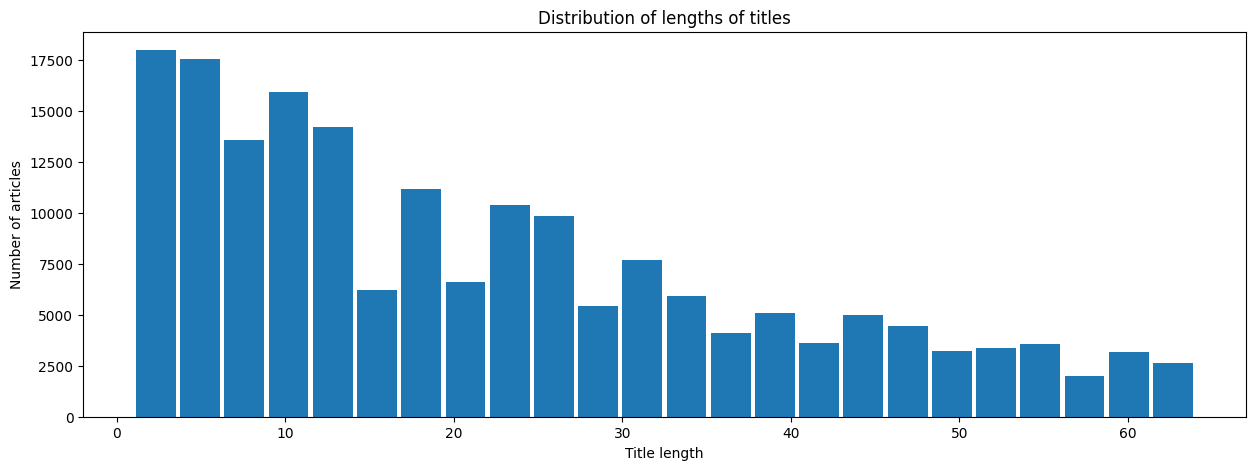

In [14]:
# Title lengths
Titles = News["title"]

tit_len = [len(Tokenizer(t)) for t in Titles]
print(f"Min title length: {min(tit_len)}")
print(f"Max title length: {max(tit_len)}")
print(f"Mean title length: {np.mean(tit_len)}")
print(f"Standard deviation title length: {np.std(tit_len)}")
print(f"Median of title length {np.median(tit_len)}")



# Plotting distribution
bins = np.linspace(min(tit_len), max(tit_len), 25)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of titles")
ax.set_xlabel("Title length")
ax.set_ylabel("Number of articles")
plt.show()



Min abstract length: 1
Max abstract length: 569
Mean abstract length: 43.03306212898112
Standard deviation abstract length: 31.03663383764924
Median of abstract length 29.0


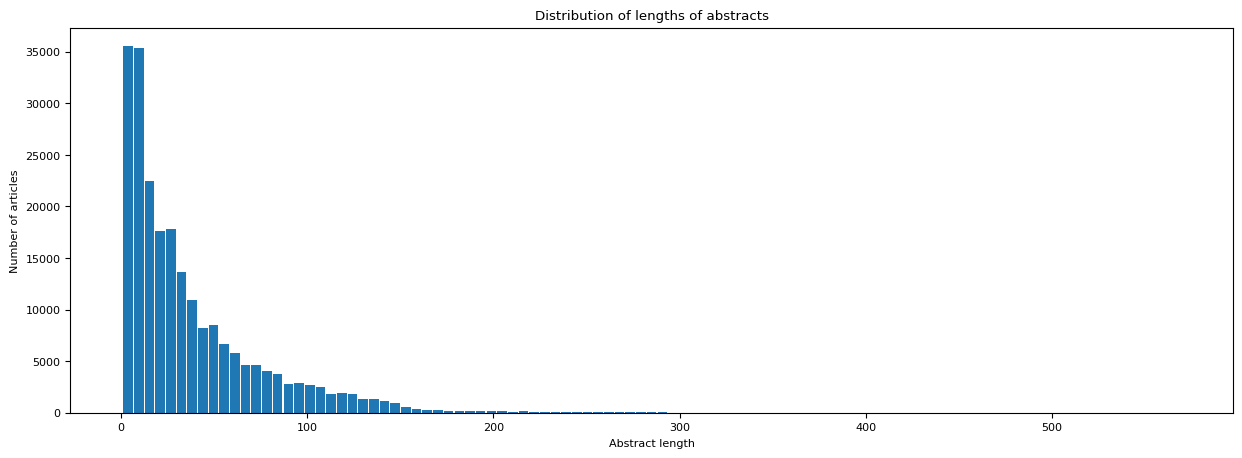

In [45]:
# Abstract lengths

# Title lengths
Abstract = News["abstract"]
Abstract = Abstract.dropna()

abs_len = [len(Tokenizer(a)) for a in Abstract]
print(f"Min abstract length: {min(abs_len)}")
print(f"Max abstract length: {max(abs_len)}")
print(f"Mean abstract length: {np.mean(abs_len)}")
print(f"Standard deviation abstract length: {np.std(abs_len)}")
print(f"Median of abstract length {np.median(abs_len)}")

# Plotting distribution
bins = np.linspace(min(abs_len), max(abs_len), 100)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of abstracts")
ax.set_xlabel("Abstract length")
ax.set_ylabel("Number of articles")
plt.show()


In [58]:
# The longest abstract
print(max(Abstract,key=len))
print(len(Tokenizer(max(Abstract,key=len))))

# How long is it with the excerpt removed?
a = max(Abstract,key=len).split('"')
print(len(Tokenizer(a[0]+a[-1])))


Real talk. Demi Moore got candid about a variety of topics in her new book, Inside Out, including her famous exes, substance abuse struggles and her heartbreaking sexual assault. "The same question kept going through my head: How did I get here?" the 56-year-old actress began in the memoir, which was released on Tuesday, September 24. "The husband who I'd thought was the love of my life had cheated on me and then decided he didn't want to work on our marriage. My children weren't speaking me. … Is this life? I wondered. Because if this is it, I'm done." Moore provided insight into all three of her marriages in the book. She was married to Freddy Moore from 1980 to 1985, Bruce Willis from 1987 to 2000 and Ashton Kutcher from 2005 to 2013. The end of the G.I. Jane star's relationship with the former That 70's Show star, however, seemed to have the biggest impact on her. "I lost me," the Ghost actress told Diane Sawyer on Good Morning America on Monday, September 23, about their split. "I

In [37]:
#top three longest abstracts:
print(Abstract[np.argmax(abs_len)])

Dan Quinn may not be going anywhere anytime soon.


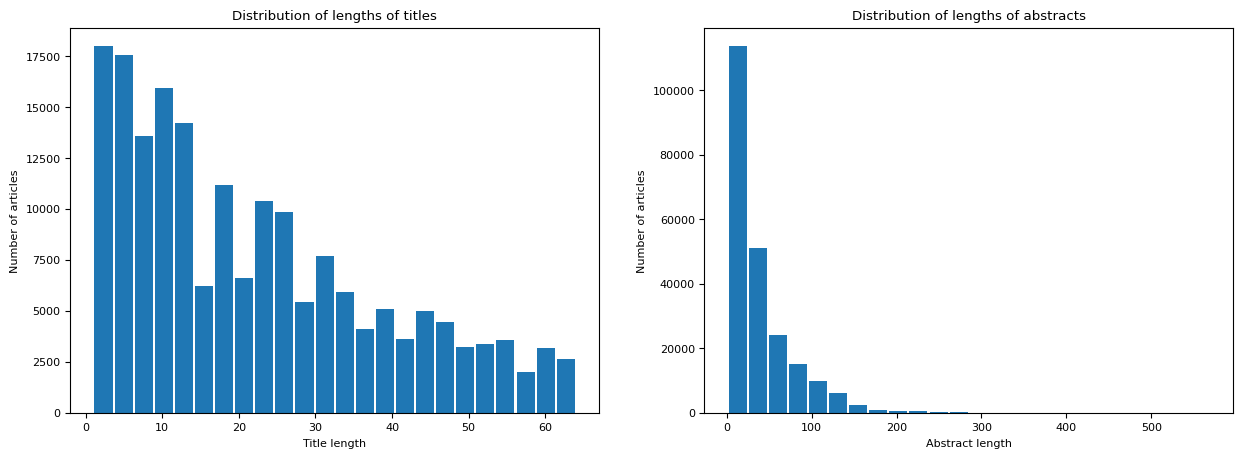

In [34]:
# Plotting side by side

# Title lengths
fig, ax = plt.subplots(1,2,figsize = (15,5))
bins = np.linspace(min(tit_len), max(tit_len), 25)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]


ax[0].bar(x, hist, width = width * 0.9)
ax[0].set_title("Distribution of lengths of titles")
ax[0].set_xlabel("Title length")
ax[0].set_ylabel("Number of articles")

# Abstract lengths
bins = np.linspace(min(abs_len), max(abs_len), 25)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]


ax[1].bar(x, hist, width = width * 0.9)
ax[1].set_title("Distribution of lengths of abstracts")
ax[1].set_xlabel("Abstract length")
ax[1].set_ylabel("Number of articles")
plt.show()




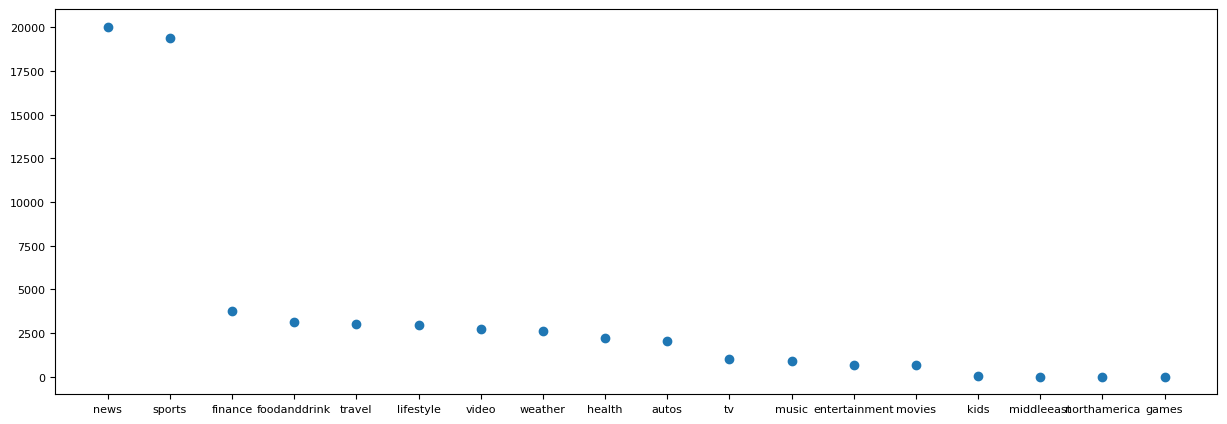

In [69]:
# Distribution of topics
cat_count = News.groupby(['category'],as_index=True)['category'].count().reset_index(name="amount")
cat_count = cat_count.sort_values('amount',ascending=False)

# Plot as scatter
plt.rcParams['font.size'] = 8
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(cat_count['category'],cat_count['amount'])
plt.show()

In [18]:
#Most and least popular categories
# print(f'5 most popular categories: \n {cat_count[:5]} \n')
# print(f'5 least popular categories: \n {cat_count[-5:]}')

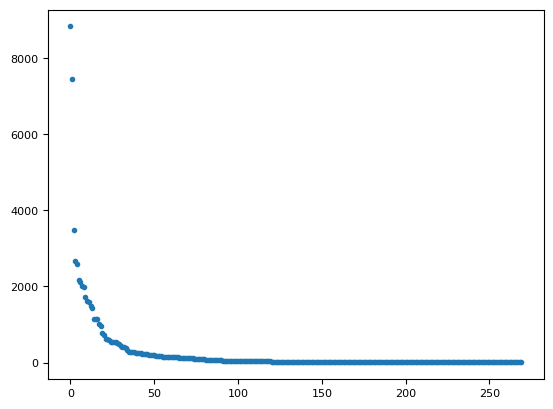

In [19]:
# Distribution of subtopics
subcat_count = News.groupby(['subcategory'],as_index=True)['subcategory'].count().reset_index(name="amount")
subcat_count = subcat_count.sort_values("amount",ascending=False)


# Plotting distribution
plt.scatter(range(len(subcat_count['amount'])),subcat_count['amount'],marker=".")
ax.set_title("Distribution of lengths of subcategories")
ax.set_xlabel("Subcategory")
ax.set_ylabel("Number of articles")
plt.show()

In [20]:
#Most and least popular subcategories
print(f'5 most popular subcategories: \n {subcat_count[:5]} \n')
print(f'5 least popular subcategories: \n {subcat_count[-5:]}')

5 most popular subcategories: 
            subcategory  amount
192             newsus    8840
99        football_nfl    7464
185       newspolitics    3478
176          newscrime    2665
263  weathertopstories    2599 

5 least popular subcategories: 
         subcategory  amount
96         foodtips       1
189  newstechnology       1
237          travel       1
102           games       1
158          mmaufc       1


In [21]:
# Most popular articles
IDs = [news for news in News['news_id']]

h = []
for i in Histories:
    h.extend(i.split(" "))

# Not all articles have been clicked on
print(f"Number of articles in news data not in user histories {len(IDs)-len(set(h))} out of {len(IDs)} total articles.")

Number of articles in news data not in user histories 20330 out of 65238 total articles.


Min article appearance count: 0
Max article appearance count: 30498
Mean article appearance count: 114.50616205279132
Standard deviation article appearance count: 622.0325730378505
Median of article appearance count 3.0


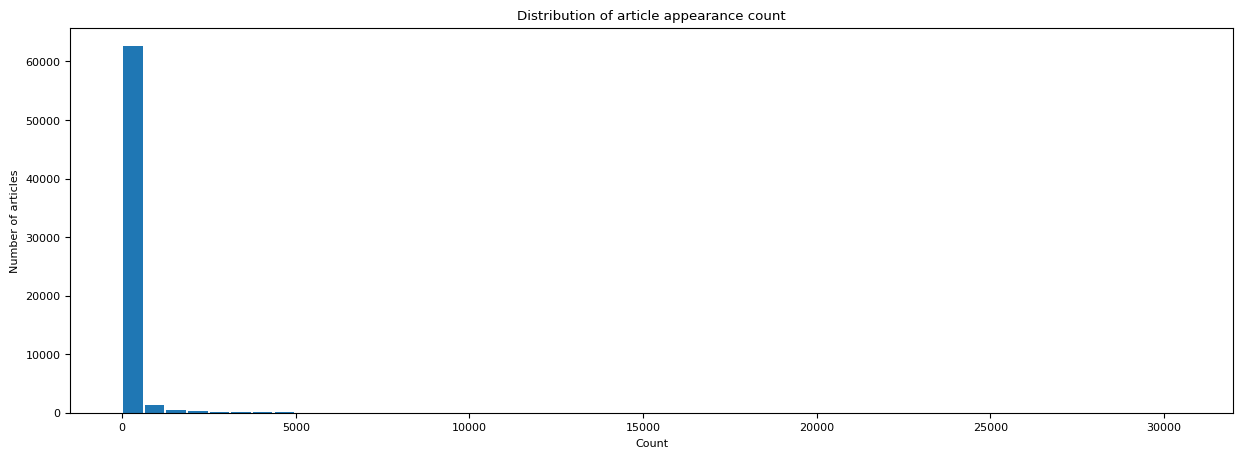

In [22]:
# Counting all articles
ids = list(Counter(h).keys())
counts = list(Counter(h).values())

di = dict(zip(ids,counts))
s = 0
for key in IDs:
    if key not in di.keys():
        di[key] = 0
        s += 1

article_counts = pd.DataFrame(di.items())
article_counts.columns = ["News ID","Count"]

#overwrite counts:
counts = article_counts["Count"]

article_counts.sort_values("Count",ascending=False)

print(f"Min article appearance count: {min(counts)}")
print(f"Max article appearance count: {max(counts)}")
print(f"Mean article appearance count: {np.mean(counts)}")
print(f"Standard deviation article appearance count: {np.std(counts)}")
print(f"Median of article appearance count {np.median(counts)}")


# Plotting  log distribution
bins = np.linspace(min(counts), max(counts), 50)
hist, edges = np.histogram(counts, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of article appearance count")
ax.set_xlabel("Count")
ax.set_ylabel("Number of articles")
plt.show()



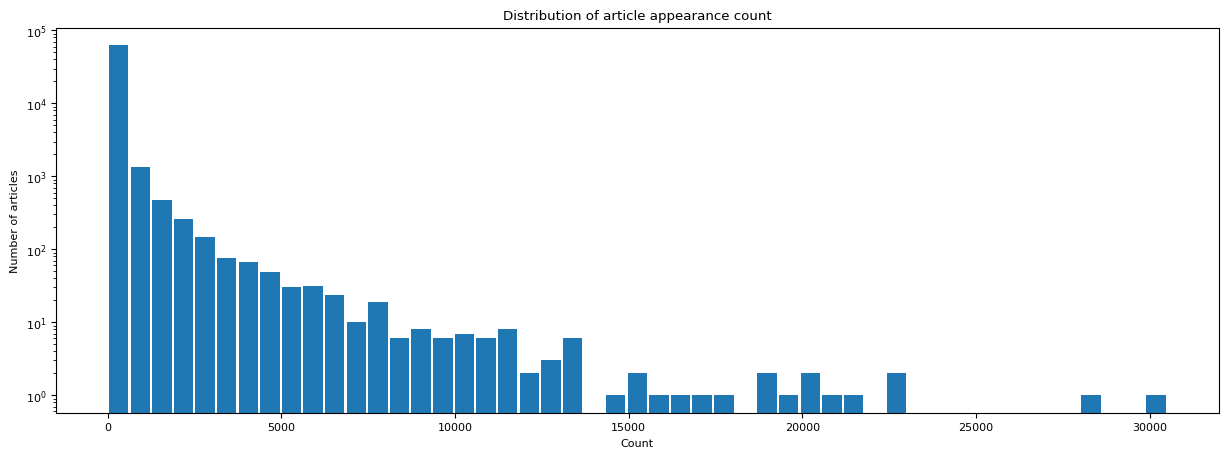

In [23]:

# Plotting  log distribution
bins = np.linspace(min(counts), max(counts), 50)
hist, edges = np.histogram(counts, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of article appearance count")
ax.set_xlabel("Count")
ax.set_ylabel("Number of articles")
ax.set_yscale('log')
plt.show()